# Exploratory Data Analysis



## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

## Load the data

In [4]:
features = pd.read_csv("./../Training/X_train.csv")
labels = pd.read_csv("./../Training/y_train.csv")

In [5]:
print(f"The shape of training feature matrix is {features.shape}")
print(f"The shape of training labels is {labels.shape}")

The shape of training feature matrix is (33050, 44)
The shape of training labels is (33050, 2)


In [6]:
#Sanity check to see if the rows in X and y corresponds to the same entities
assert (features["Unique_ID"] == labels["Unique_ID"]).all()

## Train Test split

We need to set aside a portion of our training data to perform evaluations for selecting the best model. It is best to do it in the outset itself to avoid any data leakage or bias

In [7]:
y = labels["Dependent_Variable"]
X = features.drop("Unique_ID", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y) # Random state is set to ensure reproducibility

In [8]:
print(f"The shape of X_train is {X_train.shape}")
print(f"The shape of y_train is {y_train.shape}")
print()
print(f"The shape of X_test is {X_test.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of X_train is (26440, 43)
The shape of y_train is (26440,)

The shape of X_test is (6610, 43)
The shape of y_test is (6610,)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26440 entries, 17098 to 2064
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      26440 non-null  int64  
 1   C2      26440 non-null  int64  
 2   C3      26440 non-null  int64  
 3   C4      26440 non-null  int64  
 4   C5      26440 non-null  int64  
 5   C6      26440 non-null  bool   
 6   C7      26440 non-null  int64  
 7   C8      26440 non-null  bool   
 8   N1      26440 non-null  float64
 9   N2      22735 non-null  float64
 10  N3      26137 non-null  float64
 11  N4      22743 non-null  float64
 12  N5      22743 non-null  float64
 13  N6      26137 non-null  float64
 14  N7      26083 non-null  float64
 15  N8      26440 non-null  int64  
 16  N9      26440 non-null  int64  
 17  N10     26083 non-null  float64
 18  N10.1   26083 non-null  float64
 19  N11     25856 non-null  float64
 20  N12     22735 non-null  float64
 21  N14     25940 non-null  float64


## Summary Statistics

### Label distribution

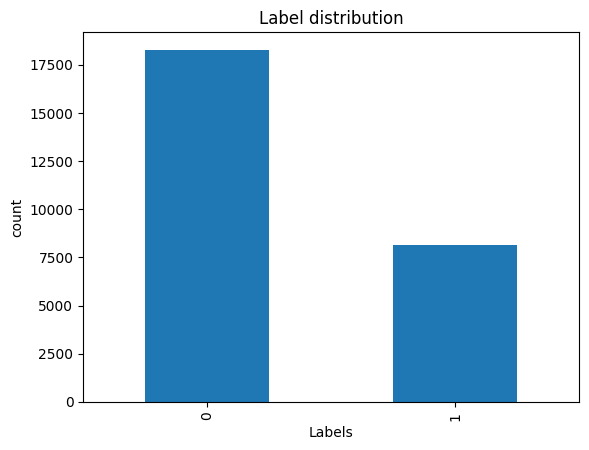

In [10]:
# Label distribution
y_train.value_counts().plot(kind='bar', xlabel='Labels', ylabel='count')
plt.title("Label distribution")
plt.show()

This is an imbalanced problem. But the imbalance is not severe.

### Summary statistics for the features

In [11]:
X_train.describe()

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000,26440.000000,22735.000000,26137.000000,22743.000000,...,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5009.000000,26440.000000,26440.000000,26083.000000
mean,1.120424,2.398260,12.870802,14.531808,1.721974,3.120386,19.944002,81.410380,3.359165,9.572836,...,20.078963,19.495745,0.543440,0.039383,7201.608569,2381.314350,1.035736,125.763056,224.761119,19.597707
std,0.400677,3.406032,12.059061,15.556776,1.324033,2.157775,8.104034,85.384654,0.414069,5.582935,...,16.035797,15.601272,2.235347,0.378866,6473.990808,3394.998311,51.267035,104.590293,187.389316,7.362751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-175.000000,20.000000,0.000000,3.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.400000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-32.000000,55.000000,98.930000,14.000000
50%,1.000000,1.000000,9.000000,10.000000,2.000000,4.000000,19.140000,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1065.990000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.840000,113.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3414.500000,33.000000,160.000000,301.125000,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.000000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,7.000000,54222.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


## Missing Values

Several numerical features have missing values. Let's take a closer look

In [13]:
missing_value_counts = pd.DataFrame({"missing_count": X_train.isna().sum()})
missing_value_counts["missing_percentage"] = missing_value_counts["missing_count"]/X_train.shape[0]
missing_value_counts.sort_values(by="missing_percentage", ascending=False)

,missing_count,missing_percentage
N32,21431,0.810552
N31,21387,0.808888
N30,21387,0.808888
N29,21387,0.808888
N28,21387,0.808888
N27,21387,0.808888
N26,21387,0.808888
N25,21387,0.808888
N2,3705,0.140129
N12,3705,0.140129


* There are no missing values in categorical features.
* Most numerical variables have missing values.
* Features N25-N32 is missing more than 80% of the time. With such large number of missing values, estimating them would be difficult/erroneous. It might be better to drop them altogether.

## Distribution of features

In [101]:
categorical_features = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
numerical_features = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8',
                    'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14','N15',
                    'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22',
                    'N23', 'N24','N25', 'N26', 'N27', 'N28', 'N29',
                    'N30', 'N31', 'N32', 'N33', 'N34','N35']

### Categorical features

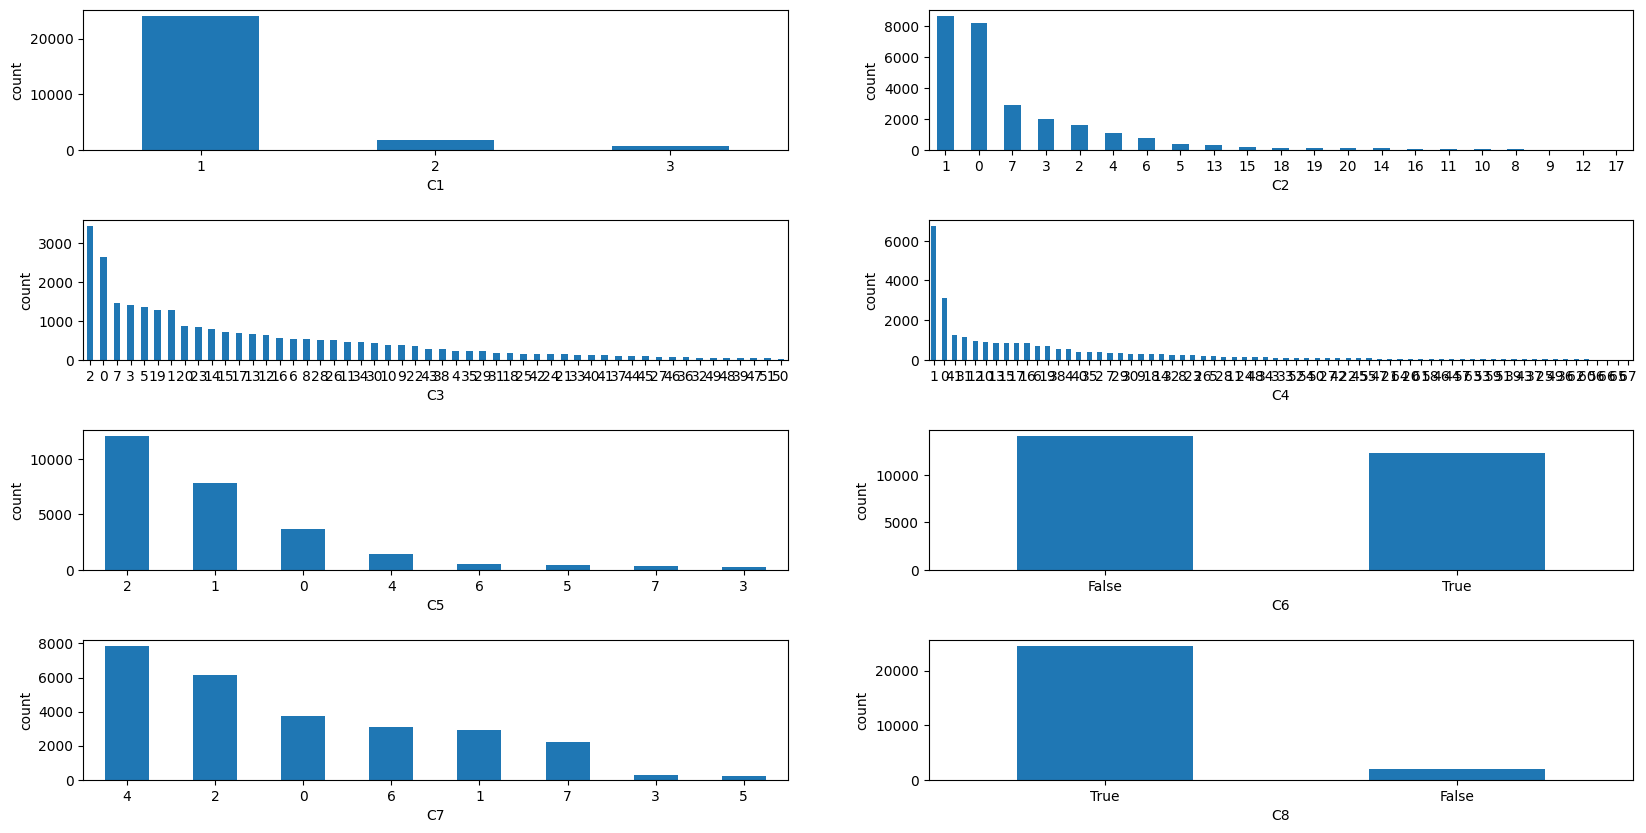

In [105]:
fig = plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(categorical_features):
    ax = plt.subplot(4, 2, i+1)
    X_train[column].value_counts().plot(ax = ax, kind='bar', xlabel=column, ylabel='count', rot=0)

plt.suptitle("Distribution of categorical features")
plt.show()

In [106]:
for col in categorical_features:
    print(f"Number of unique values in {col}: {X_train[col].nunique()}")

Number of unique values in C1: 3
Number of unique values in C2: 21
Number of unique values in C3: 52
Number of unique values in C4: 68
Number of unique values in C5: 8
Number of unique values in C6: 2
Number of unique values in C7: 8
Number of unique values in C8: 2


C2, C3, C4 are high cardinality features. When encoded this might lead to curse of dimensionality

### Numerical features

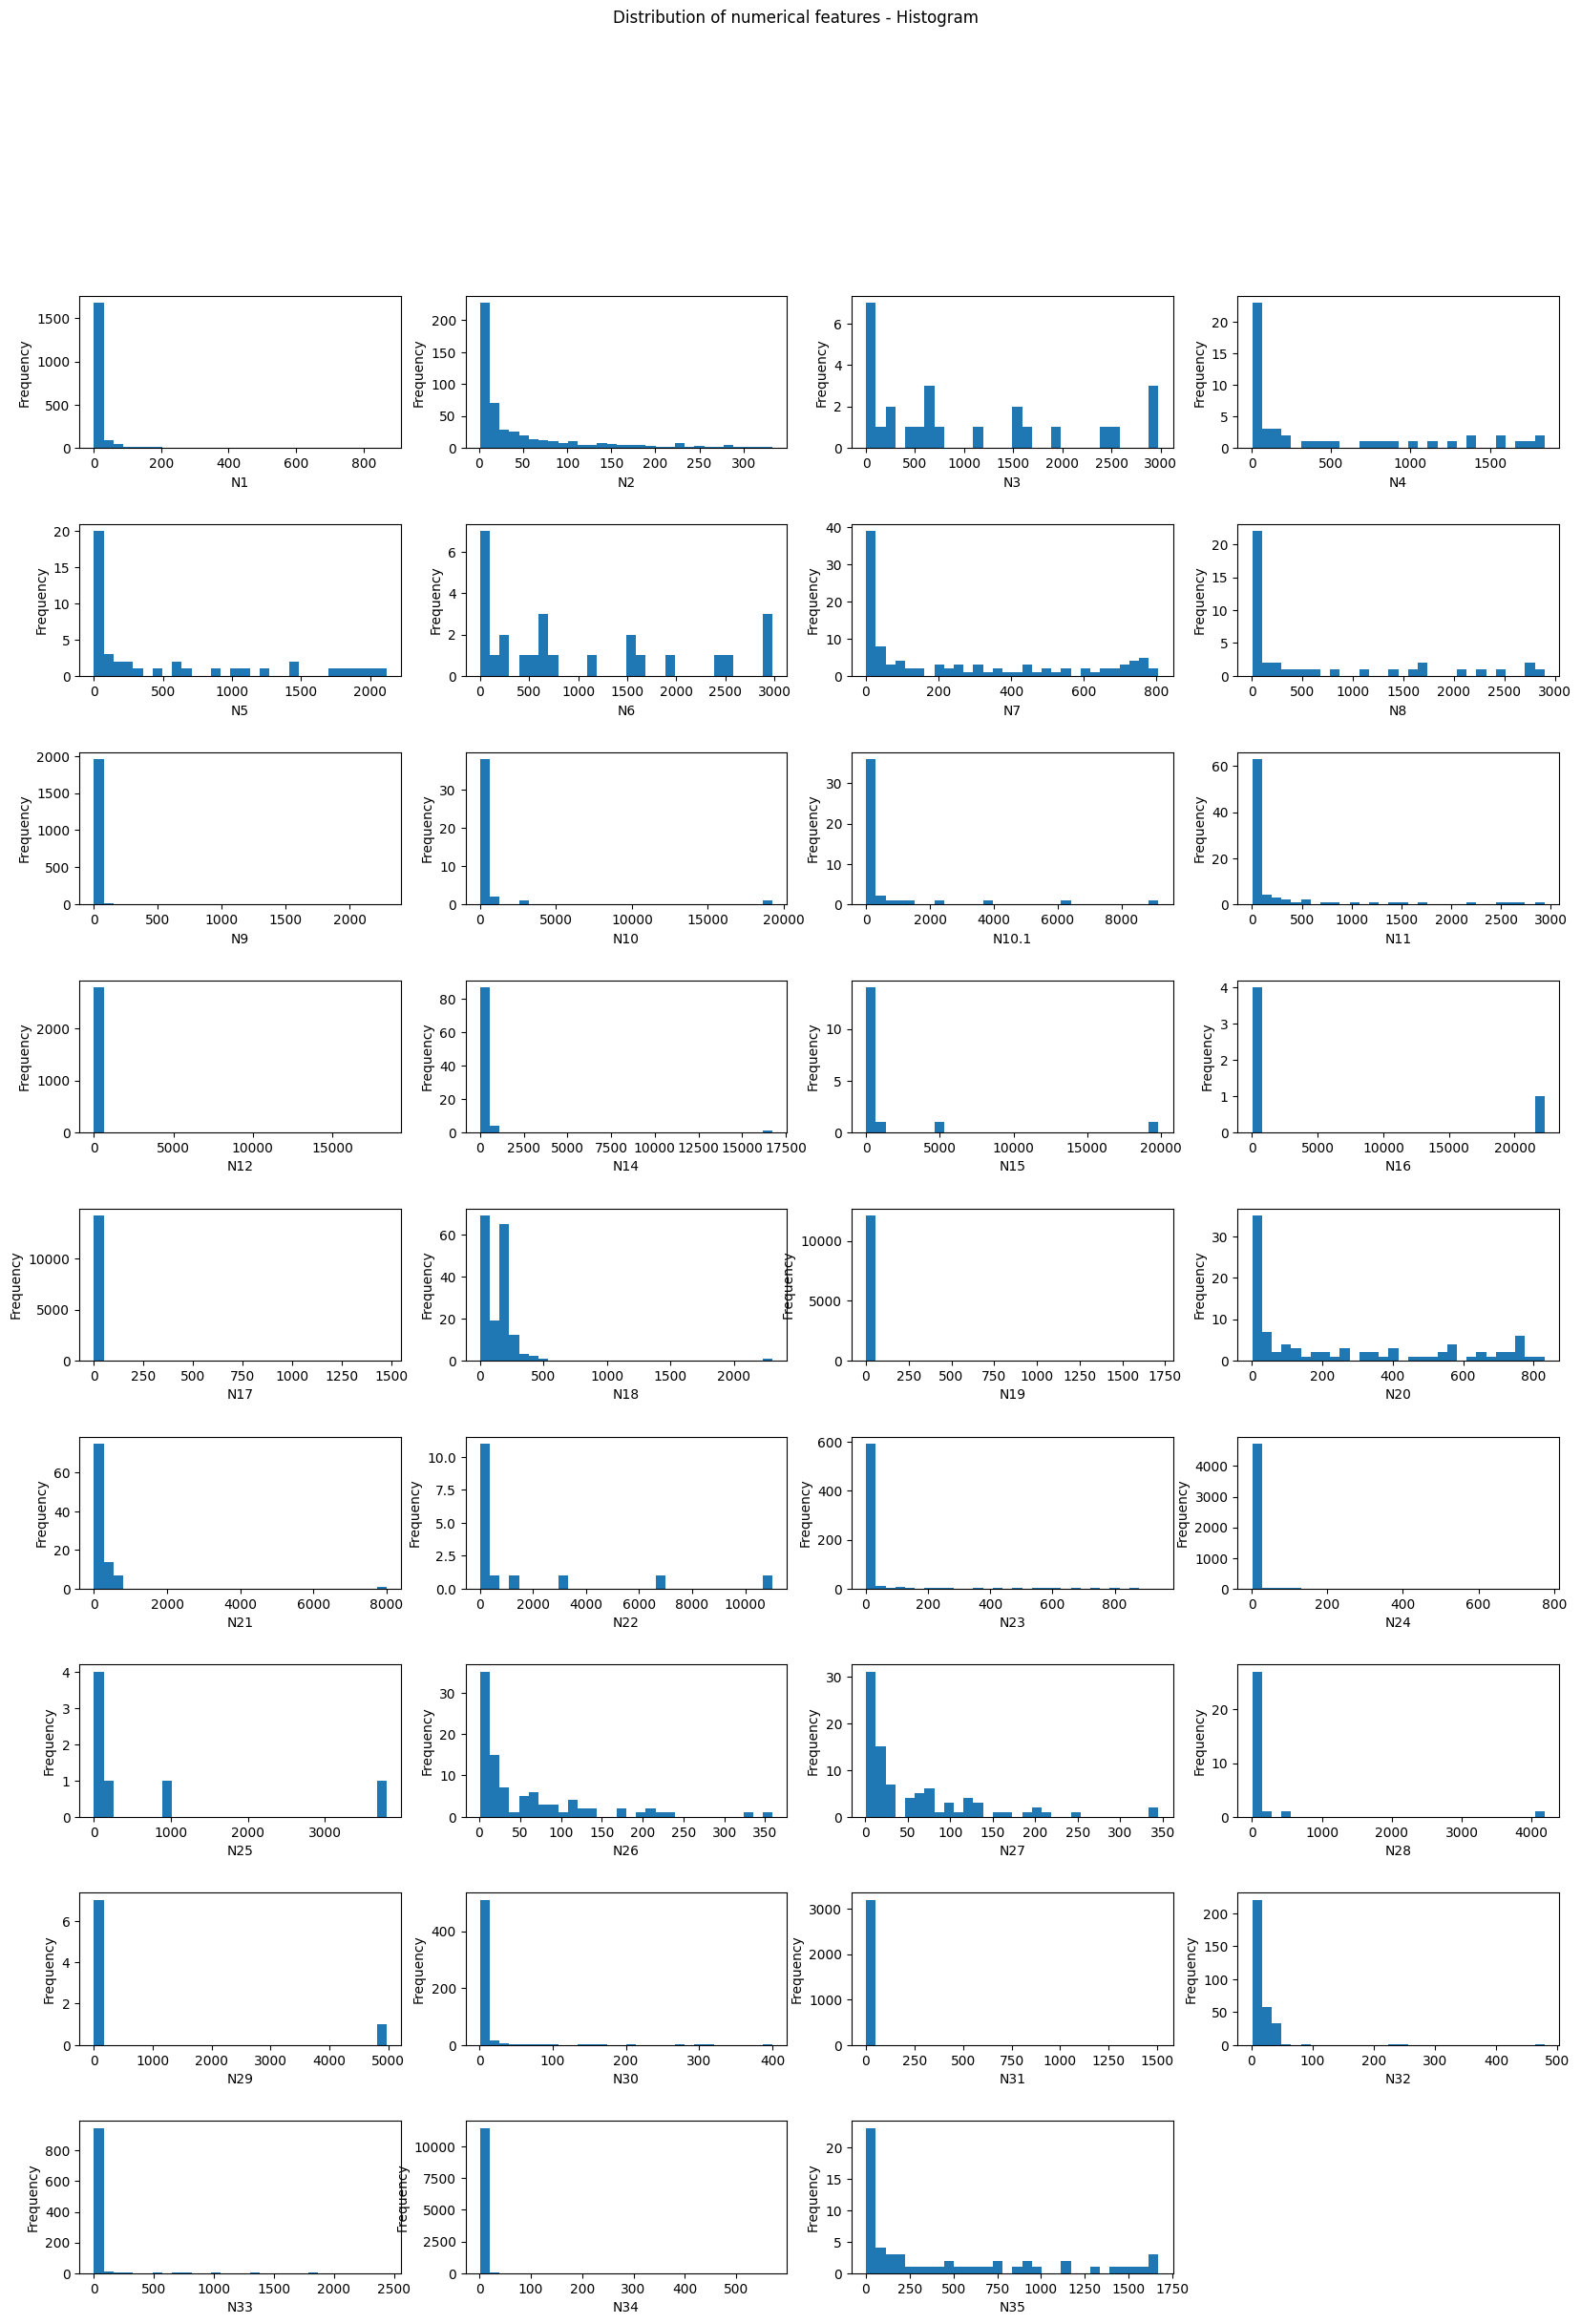

In [107]:
fig = plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(numerical_features):
    ax = plt.subplot(10, 4, i+1)
    X_train[column].value_counts().plot(ax = ax, kind='hist', bins=30, xlabel=column, ylabel='count', rot=0)
    plt.xlabel(column)

plt.suptitle("Distribution of numerical features - Histogram")
plt.show()

* Features have widely different scales
* Some features are much less variable than others

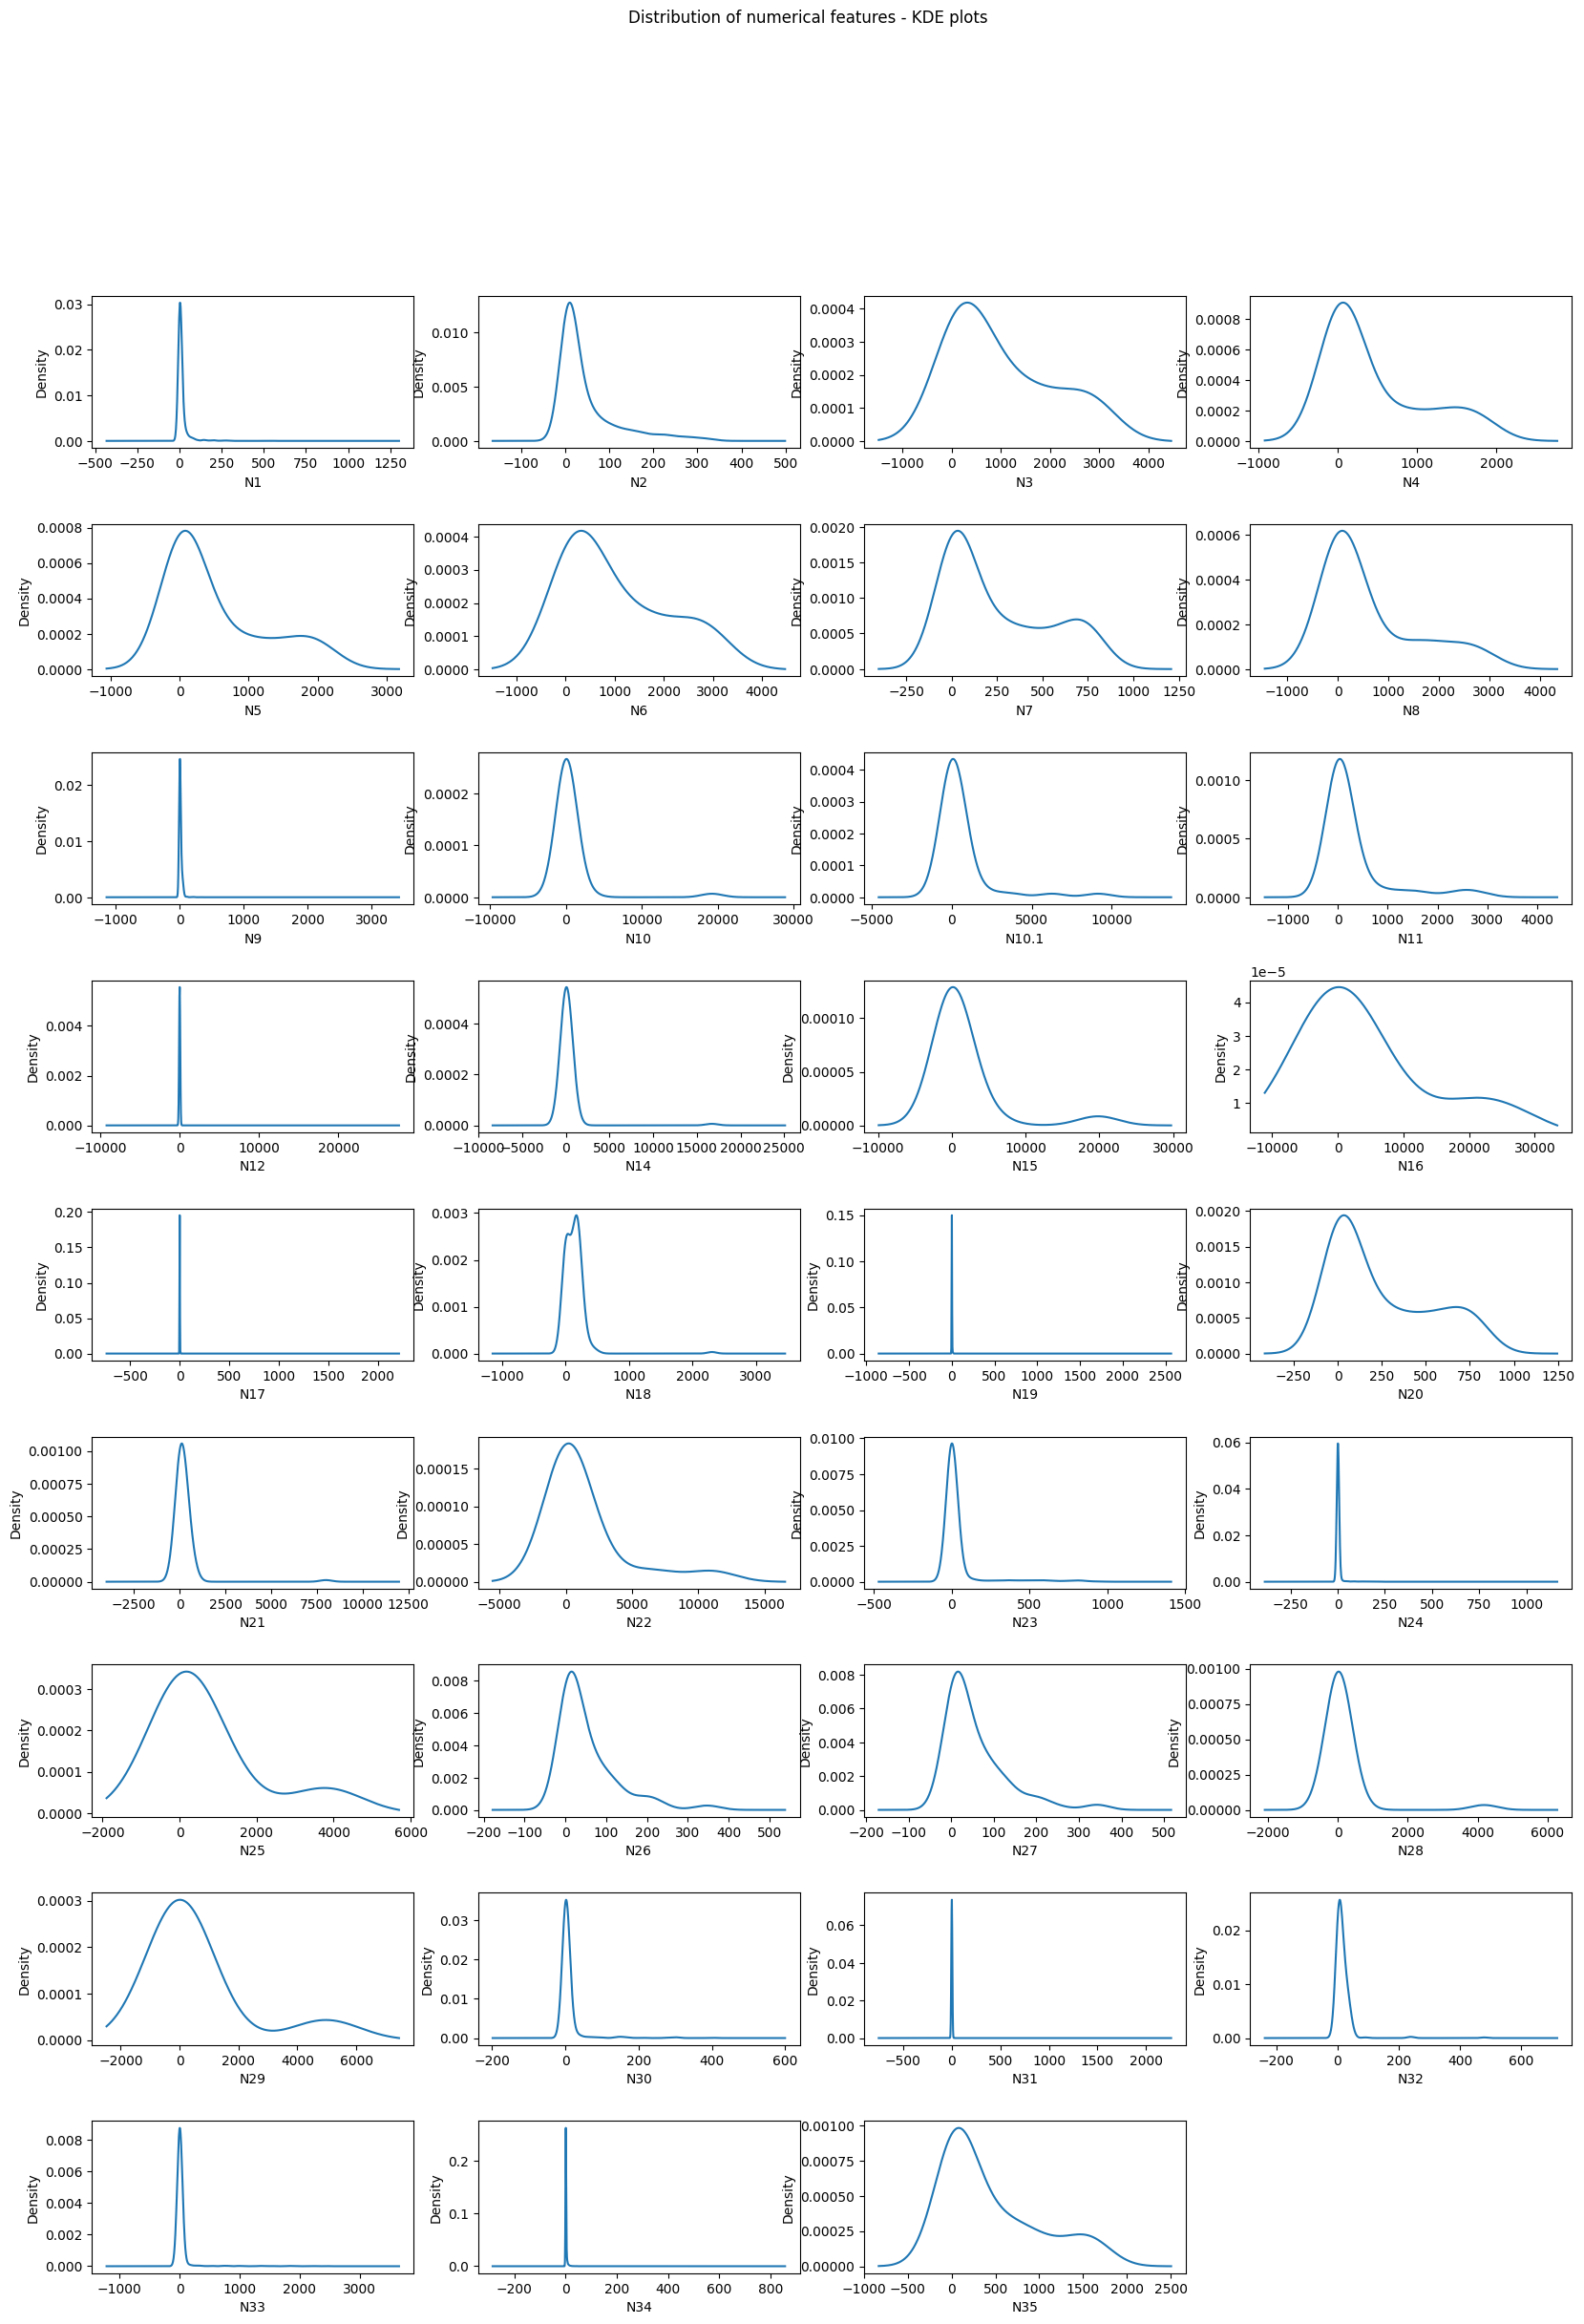

In [108]:
fig = plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
for i, column in enumerate(numerical_features):
    ax = plt.subplot(10, 4, i+1)
    X_train[column].value_counts().plot(ax = ax, kind='kde', xlabel=column, ylabel='count', rot=0)
    plt.xlabel(column)

plt.suptitle("Distribution of numerical features - KDE plots")
plt.show()

In [109]:
features_low_variability = ["N1", "N9", "N12", "N17", "N19", "N24", "N30", "N31", "N33", "N34"]

X_train[features_low_variability].describe()

,N1,N9,N12,N17,N19,N24,N30,N31,N33,N34
count,26440.000000,26440.000000,22735.000000,2.274300e+04,22770.000000,26440.000000,5053.000000,5053.000000,26440.000000,26440.000000
mean,19.944002,326.548790,1012.629382,1.589428e+04,11094.227931,5072.167253,7201.608569,2381.314350,125.763056,224.761119
std,8.104034,459.056565,6649.858456,3.464734e+04,22080.404477,6702.888002,6473.990808,3394.998311,104.590293,187.389316
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1000.000000,0.000000,20.000000,0.000000
25%,13.400000,60.000000,0.000000,1.647500e+03,523.250000,2833.333333,3000.000000,0.000000,55.000000,98.930000
50%,19.140000,184.000000,0.000000,6.042000e+03,3360.000000,4166.666667,5000.000000,1065.990000,90.000000,172.600000
75%,26.840000,417.000000,0.000000,1.618200e+04,12296.000000,6250.000000,9500.000000,3414.500000,160.000000,301.125000
max,48.000000,14985.000000,444745.000000,1.435667e+06,646285.000000,618547.833300,54222.000000,22586.670000,700.000000,2153.380000


## Correlation

Let's calculate pearson correlation for numerical features

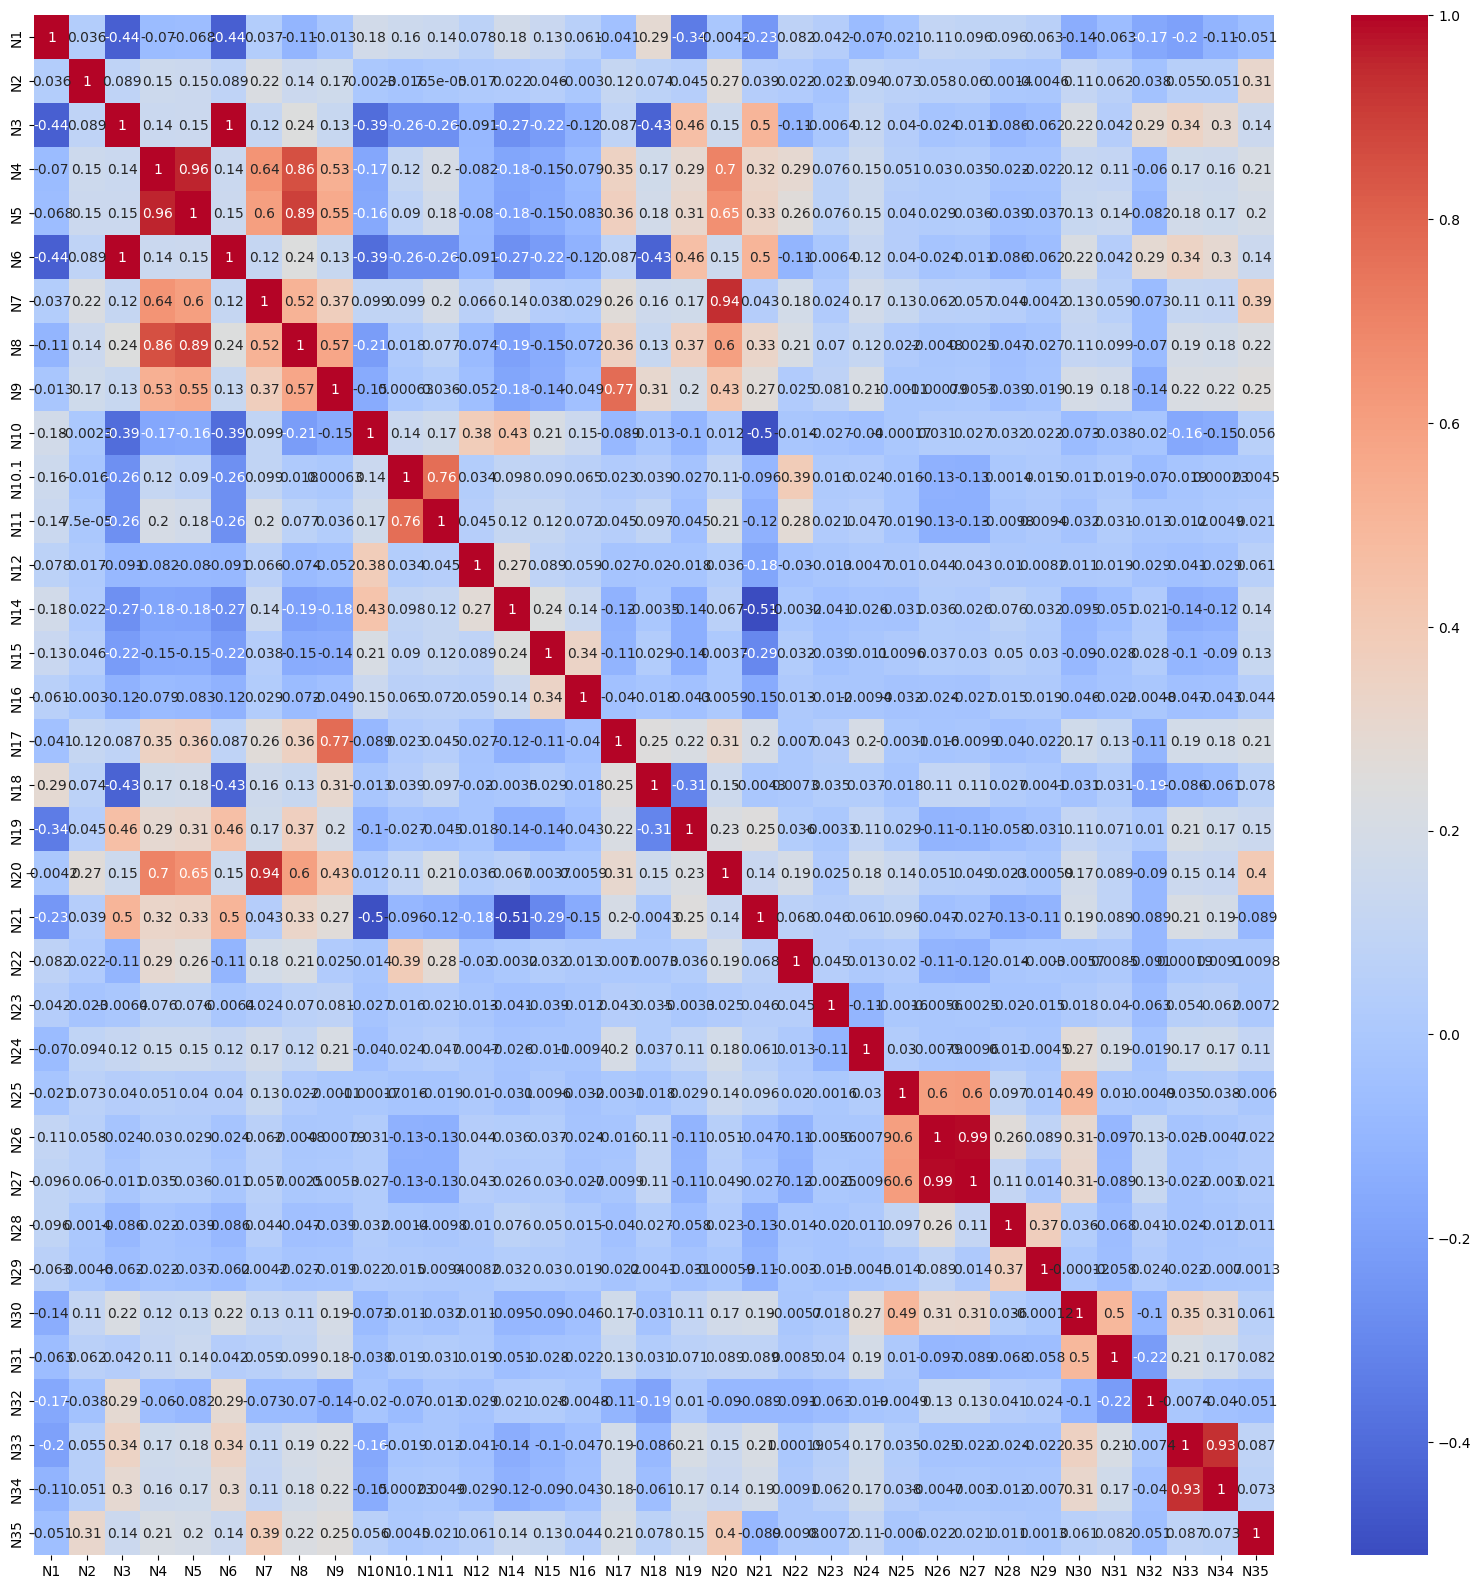

In [116]:
plt.figure(figsize=(20, 20))
corr_marix_numeric = X_train[numerical_features].corr()
heat_map = sns.heatmap(corr_marix_numeric, cmap = "coolwarm", annot=True)

Highly coreelated pairs(> 0.8)

* N3 - N6
* N4 - N5
* N4, N5 - N8
* N7 - N20
* N26 - N27
* N33 - N34 